# Pre-processing workflow

Main tasks:
- preprocess corpus
- conduct shifterator analysis on headlines

OG count: 6104199 58256

1.	Remove words that occur less than 3 times: 5929426 58256
2.	Removing noise from scrapping: 5919252 57949
3.	Find and compound bigrams/names: 5891138 57220
4.	Convert to lower case
5.	Remove symbols: 5805431 56446
6.	Change ID to identification
7.	Remove stopwords: 2678786 38846
8.	Create columns for lemmatised text and titles
9.	Create column with fullstops for word embedding analysis: 2678786 38828

FINAL COUNT: 2678786 38828

In [148]:
# Importing modules
# import re, nltk, numpy, matplotlib
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer 
# from sklearn.decomposition import LatentDirichletAllocation
# from gensim import corpora

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.stem import WordNetLemmatizer
from collections import Counter
from itertools import chain
import spacy, nltk
import matplotlib.pyplot as plt
from nltk.util import ngrams

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\2146806A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\2146806A\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\2146806A\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [94]:
# load categorised data by media ideological affiliation
df = pd.read_csv('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Data/Mediacloud-NexisUni-corpus2.csv', encoding='utf-8')
df.rename(columns={'ï»¿date': 'date'}, inplace=True)
df = df[df['Congress'] != 'other']
df.head()  

,date,maintext,title,source,media_name,ideology,Congress
0,03/01/2013,"GREG GUTFELD, CO-HOST: Hello, America. I'm G...",Reagan Era Over?; Al Jazeera Buys Current TV,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th
1,11/01/2013,With the latest threat to his leadership eas...,"His Job Safe, Straus's Next Challenge Is the G...",C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th
2,18/01/2013,Story highlights Nicolaus Mills remembers MLK'...,"48 years after MLK march, voting rights still ...",https://edition.cnn.com/2013/01/18/opinion/mil...,CNN,left,113th
3,20/01/2013,Barack and Michelle Obama have spent more th...,"Change Comes: After 4 Years, Friends See Shift...",C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th
4,21/01/2013,"SEAN HANNITY, HOST: And welcome to HANNITY, ...",Interview with Karl Rove,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th


In [95]:
# convert text to string
df['maintext'] = df['maintext'].apply(str)
df['title'] = df['title'].apply(str)

In [84]:
## CONCORDANCE ANALYSIS
# Assuming you have a DataFrame 'df' with 'maintext' and 'title' columns
corpus_title = " ".join(df['title'])
tokens_title = word_tokenize(corpus_title)
text_title = Text(tokens_title)

# Function to generate concordance for a word in a given text
def generate_concordance(text, word):
    return text.concordance(word, width=100, lines=10)

# Generate concordances for "mail" and "mail-in" in maintext
concordance_mail_maintext = generate_concordance(text_title, "mail_in")

print(concordance_mail_maintext)

Displaying 10 of 44 matches:
rizonaus missing election results prove early mail_in voting bad idea republicans expand control de
te voter identification law ballot error void mail_in votes jersey anti_voter supreme_court democra
awsuits horizon democrats gear push universal mail_in voting barack obama joins push vote_by_mail c
ory mexico victory vote_fraud_protection_free mail_in voting 'do_or_die moment ' boost vote_by_mail
ter identification requirement letters editor mail_in votes bad idea nationwide mail_in voting ball
ters editor mail_in votes bad idea nationwide mail_in voting ballot harvesting democrats unveil tri
reus ballot harvesting democratsu push expand mail_in voting republicans sue california gov gavin n
 house memorial day democrats remove barriers mail_in voting college students foreign workers pause
rule pandemic ok 'd house john pudner trumpus mail_in voting comments accidentally suppress gop tur
ansu strategy people voting editorial roundup mail_in voting ballot har

In [29]:
# word count for maintext and headlines
print(df['maintext'].str.split().str.len().sum(), df['title'].str.split().str.len().sum())

6104199 58256


### 1. Remove words that occur less than 3 times

In [96]:
# split words into lists
v = df['maintext'].str.split().tolist() # [s.split() for s in df['Col2'].tolist()]
# compute global word frequency
c = Counter(chain.from_iterable(v))
# filter, join, and re-assign
df['maintext'] = [' '.join([j for j in i if c[j] > 3]) for i in v]

In [6]:
print(df['maintext'].str.split().str.len().sum(), df['title'].str.split().str.len().sum())

5929426 58256


#### 2. Finding and compounding top bigrams

In [7]:

n_gram = 2
ngram = pd.DataFrame(Counter(ngrams(" ".join(df["maintext"]).split(), n_gram)).most_common(50))
ngram.columns=['word', 'freq']
ngram.head(15)

,word,freq
0,"(of, the)",32299
1,"(in, the)",24777
2,"(to, the)",14194
3,"(on, the)",10941
4,"(to, be)",9516
5,"(going, to)",9382
6,"(for, the)",8506
7,"(and, the)",8323
8,"(that, the)",8000
9,"(at, the)",7499


In [9]:
from nltk.util import ngrams
n_gram = 2
ngram = pd.DataFrame(Counter(ngrams(" ".join(df["title"]).split(), n_gram)).most_common(50))
ngram.columns=['word', 'freq']
ngram.head(10)

,word,freq
0,"(Voter, ID)",236
1,"(Voting, Rights)",172
2,"(voter, ID)",157
3,"(Supreme, Court)",121
4,"(North, Carolina)",113
5,"(Interview, With)",105
6,"(Opinion, :)",92
7,"(ID, Law)",88
8,"(ID, law)",77
9,"(Interview, with)",71


#### 3. Remove irrelevant words

In [97]:
import re

words_to_remove = [
    r'\bVIDEO\b', 
    r'\bCLIP\b', 
    r'\bBEGIN\b', 
    r'\bEND\b', 
    r'\bFOX NEWS\b', 
    r'\bNEW YORK\b',
    r'\bOpinion\b',
    r'\bInterview With\b', 
    r'\badvertisement\b',
    r'\bADVERTISEMENT\b',
    r'\b<U+0092>\b',
    r'\b<U+0097>\b',
    r'\b<U+0091>\b'
]

pattern = '|'.join(words_to_remove)
df['maintext'] = df['maintext'].str.replace(pattern, '', regex=True)
df['title'] = df['title'].str.replace(pattern, '', regex=True)

In [9]:
print(df['maintext'].str.split().str.len().sum(), df['title'].str.split().str.len().sum())

5919252 57949


### 4. Join bigrams

Now that we know common bigrams we can go back to preprocessing and join these in the text so that they are subsequently treated as 1 token instead of 2. 

In [98]:
def bigrams(raw_text):
    text = raw_text.replace("Supreme Court", "supreme_court")
    text = text.replace("Donald Trump", "trump")
    text = text.replace("White House", "white_house")
    text = text.replace("coronavirus", "covid")
    text = text.replace("Joe Biden", "biden")
    text = text.replace("Jim Crow", "jim_crow")
    text = text.replace("Kamala Harris", "kamala_harris")
    text = text.replace("Stacey Abrams", "stacey_abrams")
    text = text.replace("Hillary Clinton", "hillary_clinton")
    text = text.replace("South Carolina", "south_carolina")
    text = text.replace("North Carolina", "north_carolina")
    text = text.replace("United States", "united_states")
    text = text.replace("US", "united_states")
    text = text.replace("U.S.", "united_states")
    text = text.replace("USA", "united_states")
    text = text.replace("Voting Rights Act", "VRA")
    text = text.replace("Sean Hannity", "hannity")
    text = text.replace("Fox News", "fox_news")
    text = text.replace("Sen.", "senator")
    text = text.replace("'s", '')
    text = text.replace("Placeholder while article actions load", '')
    text = text.replace("g.o.p", "gop")
    text = text.replace("G.A.", "Georgia")
    text = text.replace("N.C.", "North Carolina")
    text = text.replace("Ron Desantis", "ron_desantis")
    text = text.replace("John Lewis", "john_lewis")
    text = text.replace("G.O.P", "gop")
     # split into words -> convert string into list
    words = text.split()
    words =[" ".join(words.split()) for words in words]   # remove double spaces by splitting the strings into words and joining these words again
    # converting list back to string
    return " ".join(words)

df['maintext'] = df['maintext'].apply(bigrams)
df['title'] = df['title'].apply(bigrams)

In [99]:
df['title'] = df['title'].str.replace('-', ' ')

In [11]:
print(df['maintext'].str.split().str.len().sum(), df['title'].str.split().str.len().sum())

5891138 57220


#### 5. Convert to lower case

In [100]:
# Function to convert text to lowercase
def convert_to_lowercase(raw_text):
    return raw_text.lower()

# Apply the lowercase conversion function to 'maintext' and 'title' columns
df['maintext'] = df['maintext'].apply(convert_to_lowercase)
df['title'] = df['title'].apply(convert_to_lowercase)

### 6. Remove symbols except for underscores

In [101]:
import re

def remove_symbols(text):
    # define the symbols to keep
    symbols_to_keep = '_@.£'
    
    # define the regex pattern to match all symbols and numbers except for the ones to keep
    pattern = re.compile(f'[^a-zA-Z {symbols_to_keep}\']+')
    
    # use the pattern to replace all symbols and numbers except for the ones to keep with an empty string
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text

df['maintext'] = df['maintext'].apply(remove_symbols)
df['title'] = df['title'].apply(remove_symbols)

In [ ]:
#df['title_lemma'] = df['title_lemma'].apply(remove_symbols)

In [14]:
print(df['maintext'].str.split().str.len().sum(), df['title'].str.split().str.len().sum())

5805431 56446


### 7. Change ID to identification

In [102]:
def change(text):
    text = text.replace(" id ", " identification ")
    text = text.replace(" id,", " identification,")
    text = text.replace(" id.", " identification,")
     # split into words -> convert string into list
    words = text.split()
    words =[" ".join(words.split()) for words in words]   # remove double spaces by splitting the strings into words and joining these words again
    # converting list back to string
    return " ".join(words)

df['maintext'] = df['maintext'].apply(change)
df['title'] = df['title'].apply(change)

In [16]:
print(df['maintext'].str.split().str.len().sum(), df['title'].str.split().str.len().sum())

5805431 56446


### 8. Remove stopwords

In [103]:
stop_words_file = 'C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/english.stop.txt' # Stopword list

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words

def remove_stopwords(text):
    # Tokenize the input text
    tokens = text.split()  # Assuming the text is space-separated
    
    # Remove stopwords from the tokenized text
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Join the filtered tokens back into a single string
    return ' '.join(filtered_tokens)

# Apply the remove_stopwords function to the 'maintext' column
#df['maintext'] = df['maintext'].apply(remove_stopwords)
df['title'] = df['title'].apply(remove_stopwords)

In [19]:
print(df['maintext'].str.split().str.len().sum(), df['title'].str.split().str.len().sum())

2678786 38846


In [81]:
df.head()

,date,maintext,title,source,media_name,ideology,Congress
0,03/01/2013,greg gutfeld cohost hello america. i'm greg gu...,reagan era al jazeera buys current tv,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th
1,11/01/2013,with the latest threat to his leadership easil...,job safe straus challenge gop.,C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th
2,18/01/2013,story highlights mills remembers march from se...,years mlk march voting rights vulnerable,https://edition.cnn.com/2013/01/18/opinion/mil...,CNN,left,113th
3,20/01/2013,barack and michelle obama have spent more than...,change years friends shifts obamas,C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th
4,21/01/2013,sean hannity host and welcome to hannity just ...,interview karl rove,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th


In [25]:
# Print the 20 random rows of the maintext column
df['maintext'].sample(30)

# exporting 30 first rows of maintext column to txt file
df['maintext'].sample(30).to_csv('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/maintext.txt', header=None, index=None, sep=' ', mode='a')

### 9. Lemmatise text

In [18]:


# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define a custom lemmatization function
def lemma(text):
    # Split the text into tokens
    tokens = nlp(text)
    
    # Customize the lemmatization for specific words
    lemmatized_tokens = []
    for token in tokens:
        if token.text.lower() == "media":
            lemmatized_tokens.append("media")
        elif token.text.lower() == "voting":
            lemmatized_tokens.append("vote")
        else:
            lemmatized_tokens.append(token.lemma_)
    
    # Join the lemmatized tokens back into a string
    return " ".join(lemmatized_tokens)


In [21]:
df['text_lemma'] = df['maintext'].apply(lemma)
df['title_lemma'] = df['title'].apply(lemma)

NameError: name 'lemma' is not defined

### 10. Create column without fullstops

In [104]:
# Duplicate the 'maintext' and 'title' columns

df['maintext_no_fullstop'] = df['maintext']

# Define a function to remove full stops from a column
def remove_fullstops(text):
    if isinstance(text, str):
        text = re.sub(r'\.', '', text)  # Remove full stops
        text = re.sub(r'\s+', ' ', text)  # Remove extra white spaces
        text = text.strip()  # Remove leading/trailing whitespace
        return text
    else:
        return text


# Apply the function to the duplicated columns
df['maintext_no_fullstop'] = df['maintext_no_fullstop'].apply(remove_fullstops)
# If you want to remove full stops from the 'title' column as well, uncomment the line below
df['title'] = df['title'].apply(remove_fullstops)


In [21]:
df['title_lemma'] = df['title_lemma'].apply(remove_fullstops)

DONT RUN CODE BELOW!

In [22]:
print(df['maintext'].str.split().str.len().sum(), df['title'].str.split().str.len().sum())

2678786 38828


In [45]:
df.head()

,date,maintext,title,source,media_name,ideology,Congress,maintext_no_fullstop
0,03/01/2013,greg gutfeld cohost hello america. i'm greg gu...,reagan era al jazeera buys current tv,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th,greg gutfeld cohost hello america i'm greg gut...
1,11/01/2013,with the latest threat to his leadership easil...,job safe straus challenge gop,C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th,with the latest threat to his leadership easil...
2,18/01/2013,story highlights mills remembers march from se...,years mlk march voting rights vulnerable,https://edition.cnn.com/2013/01/18/opinion/mil...,CNN,left,113th,story highlights mills remembers march from se...
3,20/01/2013,barack and michelle obama have spent more than...,change years friends shifts obamas,C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th,barack and michelle obama have spent more than...
4,21/01/2013,sean hannity host and welcome to hannity just ...,interview karl rove,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th,sean hannity host and welcome to hannity just ...


In [109]:
def bigrams2(raw_text):
    text = raw_text.replace("eric holder", "eric_holder")
    text = text.replace("john lewis", "john_lewis")
    text = text.replace("kris kobach", "kris_kobach")
    text = text.replace("brian kemp", "brian_kemp")
    text = text.replace("joe manchin", "joe_manchin")
    text = text.replace("joe biden", "biden")
    text = text.replace("president biden", "biden")
    text = text.replace("president joe biden", "biden")
    text = text.replace("president trump", "trump")
    text = text.replace("president donald trump", "trump")
    text = text.replace(" id ", " identification ")
    text = text.replace("ron desantis", "ron_desantis")
    text = text.replace("trumpus", "trump")
    # split into words -> convert string into list
    words = text.split()
    words = [" ".join(word.split()) for word in words]   # remove double spaces
    # converting list back to string
    return " ".join(words)

In [110]:
df['title'] = df['title'].apply(bigrams2)
df['maintext'] = df['maintext'].apply(bigrams2)

In [70]:

df['title_lemma'] = df['title'].apply(lemma)
df.head()

,date,maintext,title,source,media_name,ideology,Congress,text_lemma,title_lemma,maintext_no_fullstop
0,03/01/2013,greg gutfeld cohost america. greg gutfeld andr...,reagan era al jazeera buys current tv,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th,greg gutfeld cohost america . greg gutfeld and...,reagan era al jazeera buy current tv,greg gutfeld cohost america greg gutfeld andre...
1,11/01/2013,latest threat leadership easily speaker house ...,job safe straus challenge gop,C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th,late threat leadership easily speaker house jo...,job safe straus challenge gop,latest threat leadership easily speaker house ...
2,18/01/2013,story highlights mills remembers march selma m...,years mlk march voting rights vulnerable,https://edition.cnn.com/2013/01/18/opinion/mil...,CNN,left,113th,story highlight mill remember march selma mont...,year mlk march vote right vulnerable,story highlights mills remembers march selma m...
3,20/01/2013,barack michelle obama spent thousand days disp...,change years friends shifts obamas,C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th,barack michelle obama spend thousand day displ...,change year friend shift obama,barack michelle obama spent thousand days disp...
4,21/01/2013,sean hannity host hannity moments ago presiden...,interview karl rove,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th,sean hannity host hannity moment ago president...,interview karl rove,sean hannity host hannity moments ago presiden...


In [91]:
## CONCORDANCE ANALYSIS

# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.text import Text

# Download necessary resources (uncomment the line below if not already downloaded)
# nltk.download('punkt')

# Assuming you have a DataFrame 'df' with 'maintext' and 'title' columns
corpus_title = " ".join(df['title'])
tokens_title = word_tokenize(corpus_title)
text_title = Text(tokens_title)

# Function to generate concordance for a word in a given text
def generate_concordance(text, word):
    return text.concordance(word, width=100, lines=10)

# Generate concordances for "mail" and "mail-in" in maintext
concordance_mail_maintext = generate_concordance(text_title, "trumpus")

print(concordance_mail_maintext)


no matches
None


In [106]:
# Download the WordNet corpus (uncomment the line below if not already downloaded)
nltk.download('wordnet')

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

# List of words to exclude from lemmatization
exclude_from_lemmatization = ['rights', 'media']

# Dictionary of word replacements
word_replacements = {'dems': 'democrats', 'rep': 'republican', 'reps': 'republicans'}


# Function to lemmatize a string while excluding certain words and handling replacements
def lemmatize_with_exclusion_and_replacement(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) if word not in exclude_from_lemmatization else word for word in words]
    replaced_words = [word_replacements.get(word, word) for word in lemmatized_words]
    return ' '.join(replaced_words)

# Assuming you have a DataFrame 'df' with a 'title' column
df['title'] = df['title'].apply(lemmatize_with_exclusion_and_replacement)

# Display the updated DataFrame
print(df.head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\2146806A\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


         date                                           maintext  \
0  03/01/2013  greg gutfeld cohost hello america. i'm greg gu...   
1  11/01/2013  with the latest threat to his leadership easil...   
2  18/01/2013  story highlights mills remembers march from se...   
3  20/01/2013  barack and michelle obama have spent more than...   
4  21/01/2013  sean hannity host and welcome to hannity just ...   

                                     title  \
0     reagan era al jazeera buy current tv   
1            job safe straus challenge gop   
2  year mlk march voting rights vulnerable   
3          change year friend shift obamas   
4                      interview karl rove   

                                              source          media_name  \
0  C:/Users/2146806A/OneDrive - University of Gla...            Fox News   
1  C:/Users/2146806A/OneDrive - University of Gla...  The New York Times   
2  https://edition.cnn.com/2013/01/18/opinion/mil...                 CNN   
3  C:/User

### Shifterator

In [131]:
# ON TITLES 

df['title'] = df['title'].str.replace("'", "")
df['maintext_no_fullstop'] = df['maintext_no_fullstop'].str.replace("'", "")

# create two different datasets for media split by ideology
ideology = df.groupby("ideology")
left = ideology.get_group('left')
right = ideology.get_group('right')

# we transform the text column into a string for both datasets
left_text =left['title'].apply(str)
right_text= right['title'].apply(str) 

tokens_left = [" ".join(strings.split()) for strings in left_text] #takes a list of strings (left_text) and splits each string into a list of substrings (words) based on whitespaces
string_left = " ".join(tokens_left) # Joins the resulting list of strings

tokens_right = [" ".join(strings.split()) for strings in right_text] 
string_right = " ".join(tokens_right)

# we define a function that creates a dictionary with the tokens and the counts in each string
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

# word counts for each set of media
left_dic = word_count(string_left)
right_dic = word_count(string_right)

import shifterator as sh
# we use shifterator to calculate proportion shifts
proportion_shift = sh.ProportionShift(type2freq_1=left_dic, type2freq_2=right_dic)

# we get the scores out of the proportion shift
test_dict=proportion_shift.get_shift_scores() 
# we create a dataframe with scores
shift_titles = pd.DataFrame.from_dict({'score': list(test_dict.values()), 'word': list(test_dict.keys())})
# separate scores by right vs left depending on whether the number is positive or negative
shift_titles['left_right'] = np.where(shift_titles['score']<0, 'left', 'right')
shift_titles

,score,word,left_right
0,0.000094,divert,right
1,0.000047,prep,right
2,-0.000130,dissented,left
3,-0.000065,grapple,left
4,0.000564,tucker,right
...,...,...,...
6919,0.000047,ram,right
6920,0.000047,client,right
6921,0.000047,granting,right
6922,-0.000065,ala,left


In [64]:
shift_titles.loc[df2['word'] == "donald", 'score'].iloc[0]

8.840516085218666e-05

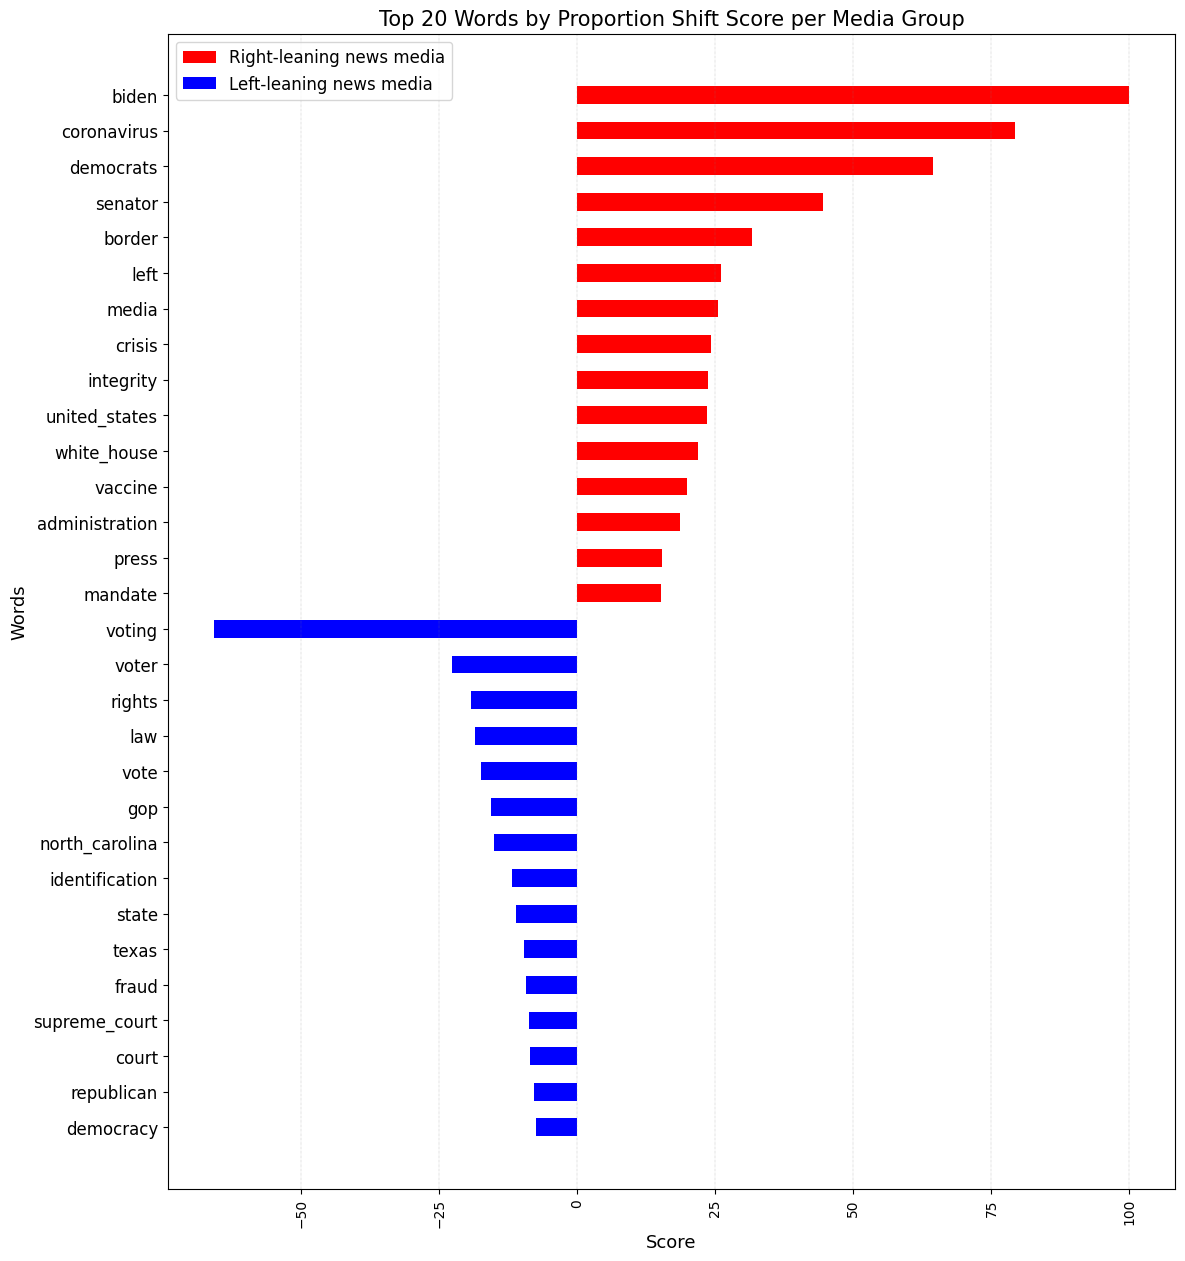

In [134]:
# Filter out the words "interview" and "rep"
words_to_remove = ['interview']
shift_titles = shift_titles[~shift_titles['word'].isin(words_to_remove)]

# calculate the maximum absolute score
max_score = max(abs(shift_titles['score']))

# calculate normalized scores with sign flip
shift_titles['norm_score'] = shift_titles['score'].apply(lambda x: -x if x > 0 else abs(x)) / max_score * 100

# Get the top 15 words by score for each group
group1_top_20 = shift_titles[shift_titles['left_right'] == 'right'].nlargest(15, 'score')
group2_top_20 = shift_titles[shift_titles['left_right'] == 'left'].nsmallest(15, 'score')

# create bar chart
fig, ax = plt.subplots(figsize=(13, 15))

# Plot the top 20 words by score for each group
ax.barh(group1_top_20['word'], group2_top_20['norm_score'], color='red', label='Right-leaning news media', height=0.5)
ax.barh(group2_top_20['word'], group1_top_20['norm_score'], color='blue', label='Left-leaning news media', height=0.5)
plt.xlabel('Score', fontsize=13)
plt.ylabel('Words', fontsize=13)
plt.xticks(rotation=90)
plt.title('Top 20 Words by Proportion Shift Score per Media Group', fontsize=15)
plt.legend()
plt.gca().invert_yaxis()
ax.grid(axis='x', color='gray', linestyle='dashdot', linewidth=0.3, alpha=0.5)

# Set the font size of the tick labels on the Y axis
ax.tick_params(axis='y', labelsize=12)

# set the fontsize of the legend
ax.legend(fontsize=12)

plt.show()
#fig.savefig('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Plots/shifterator', dpi=300, bbox_inches='tight')


In [138]:
abbr_replacements = {
    r'\bdem\b': 'democrats',
    r'\bcovid\b': 'coronavirus',
    r'\binterviewed\b': ' ',
    r'\bid\b': 'identification',
    r'\bga\b': 'georgia',
    r'\bny\b': 'new_york',
    r'\bnc\b': 'north_carolina',
    r'\bsc\b': 'south_carolina'
}

for pattern, replacement in abbr_replacements.items():
    df['title'] = df['title'].str.replace(pattern, replacement, case=False)


C:\Users\2146806A\AppData\Local\Temp\ipykernel_31324\3695231213.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r'\bid\b', 'identification', case=False)


In [147]:
## CONCORDANCE ANALYSIS
corpus_title = " ".join(df['title'])
tokens_title = word_tokenize(corpus_title)
text_title = Text(tokens_title)

def generate_concordance(text, word):
    return text.concordance(word, width=100, lines=10)

concordance_mail_maintext = generate_concordance(text_title, "usa")
print(concordance_mail_maintext)

no matches
None


In [91]:
shift_titles
max_score = shift_titles['norm_score'].max()
max_score


100.0

In [135]:
shift_titles.to_csv('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Data/shifterator_scores_text_nov23.csv', index = False)

In [83]:
# ON LEMMATISED TITLES
df['title_lemma'] = df['title'].str.replace("'", "")

# create two different datasets for media split by ideology
ideology = df.groupby("ideology")
left = ideology.get_group('left')
right = ideology.get_group('right')

# we transform the text column into a string for both datasets
left_text =left['title_lemma'].apply(str)
right_text= right['title_lemma'].apply(str) 

tokens_left = [" ".join(strings.split()) for strings in left_text] #takes a list of strings (left_text) and splits each string into a list of substrings (words) based on whitespaces
string_left = " ".join(tokens_left) # Joins the resulting list of strings

tokens_right = [" ".join(strings.split()) for strings in right_text] 
string_right = " ".join(tokens_right)

# we define a function that creates a dictionary with the tokens and the counts in each string
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts


# word counts for each set of media
left_dic = word_count(string_left)
right_dic = word_count(string_right)

import shifterator as sh
# we use shifterator to calculate proportion shifts
proportion_shift_lemma = sh.ProportionShift(type2freq_1=left_dic, type2freq_2=right_dic)

import numpy as np

# we get the scores out of the proportion shift
test_dict_lemma=proportion_shift_lemma.get_shift_scores() 
# we create a dataframe with scores
shift_titles_lemma = pd.DataFrame.from_dict({'score': list(test_dict_lemma.values()), 'word': list(test_dict_lemma.keys())})
# separate scores by right vs left depending on whether the number is positive or negative
shift_titles_lemma['left_right'] = np.where(shift_titles_lemma['score']<0, 'left', 'right')
shift_titles_lemma

,score,word,left_right
0,-0.000062,fan,left
1,-0.000018,protesting,left
2,0.000088,fully,right
3,0.000169,concerns,right
4,0.000071,status,right
...,...,...,...
7918,-0.000141,wednesday,left
7919,0.000044,votereducation,right
7920,0.000044,indefinitely,right
7921,0.000442,rla,right


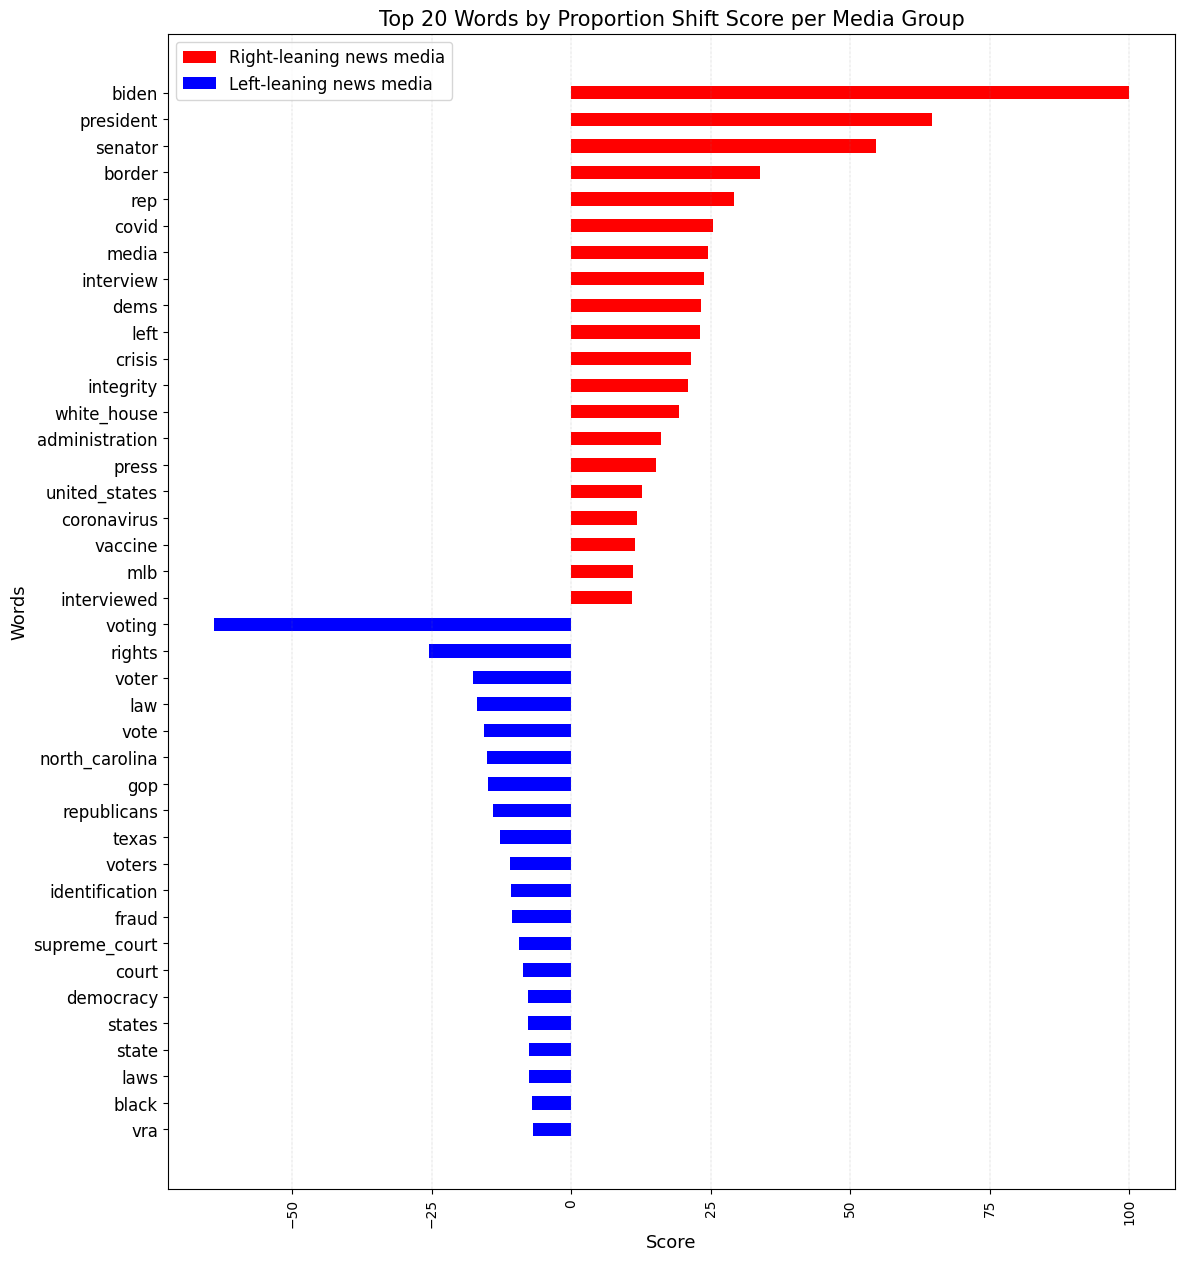

In [84]:
import matplotlib.pyplot as plt

# calculate the maximum absolute score
max_score = max(abs(shift_titles_lemma['score']))

# calculate normalized scores with sign flip
shift_titles_lemma['norm_score'] = shift_titles_lemma['score'].apply(lambda x: -x if x > 0 else abs(x)) / max_score * 100

# Get the top 15 words by score for each group
group1_top_20 = shift_titles_lemma[shift_titles_lemma['left_right'] == 'right'].nlargest(20, 'score')
group2_top_20 = shift_titles_lemma[shift_titles_lemma['left_right'] == 'left'].nsmallest(20, 'score')

# create bar chart
fig, ax = plt.subplots(figsize=(13, 15))

# Plot the top 20 words by score for each group
ax.barh(group1_top_20['word'], group2_top_20['norm_score'], color='red', label='Right-leaning news media', height=0.5)
ax.barh(group2_top_20['word'], group1_top_20['norm_score'], color='blue', label='Left-leaning news media', height=0.5)
plt.xlabel('Score', fontsize=13)
plt.ylabel('Words', fontsize=13)
plt.xticks(rotation=90)
plt.title('Top 20 Words by Proportion Shift Score per Media Group', fontsize=15)
plt.legend()
plt.gca().invert_yaxis()
ax.grid(axis='x', color='gray', linestyle='dashdot', linewidth=0.3, alpha=0.5)

# Set the font size of the tick labels on the Y axis
ax.tick_params(axis='y', labelsize=12)

# set the fontsize of the legend
ax.legend(fontsize=12)

plt.show()
#fig.savefig('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Plots/shifterator', dpi=300, bbox_inches='tight')


## Word Frequencies

In [78]:
# creating two different datasets for media split by ideology
ideology = df.groupby("ideology")
left = ideology.get_group('left')
right = ideology.get_group('right')

In [79]:
# Finding top words in overall corpus
cnt_df = (pd.DataFrame(Counter(" ".join(df["maintext"]).split(" ")).most_common(10))) 
cnt_df.columns=['df', 'freq']

# Top right media words
cnt_right = (pd.DataFrame(Counter(" ".join(right["maintext"]).split(" ")).most_common(10)))
cnt_right.columns=['right', 'freq']

# Top left media words
cnt_left = (pd.DataFrame(Counter(" ".join(left["maintext"]).split(" ")).most_common(10)))
cnt_left.columns=['left', 'freq']

In [80]:
cnt = [cnt_df, cnt_left, cnt_right]
result = pd.concat(cnt, axis=1)
result

,df,freq,left,freq,right,freq
0,state,19263,voting,13353,people,11863
1,people,18883,state,12854,president,7975
2,voting,18148,voter,10787,biden,6948
3,election,17003,election,10241,election,6762
4,voter,16717,voters,8786,state,6409
5,president,12824,mr.,7691,trump,5960
6,trump,12686,republican,7026,voter,5930
7,voters,12082,people,7020,voting,4795
8,identification,11353,identification,6806,democrats,4772
9,vote,10986,vote,6800,identification,4547


In [ ]:
# Defining function to plot top words
import pandas as pd
import matplotlib.pyplot as plt

def scatterplot(df, x_dim, y_dim):
  x = df[x_dim]
  y = df[y_dim]
  fig, ax = plt.subplots(figsize=(15, 7))
  #customizes alpha for each dot in the scatter plot
  ax.scatter(x, y, alpha=0.70)
 
  #adds a title and axes labels
  ax.set_title('Word Frequencies')
  ax.set_xlabel('Frequency')
  ax.set_ylabel('Word')
 
  #removing top and right borders
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()

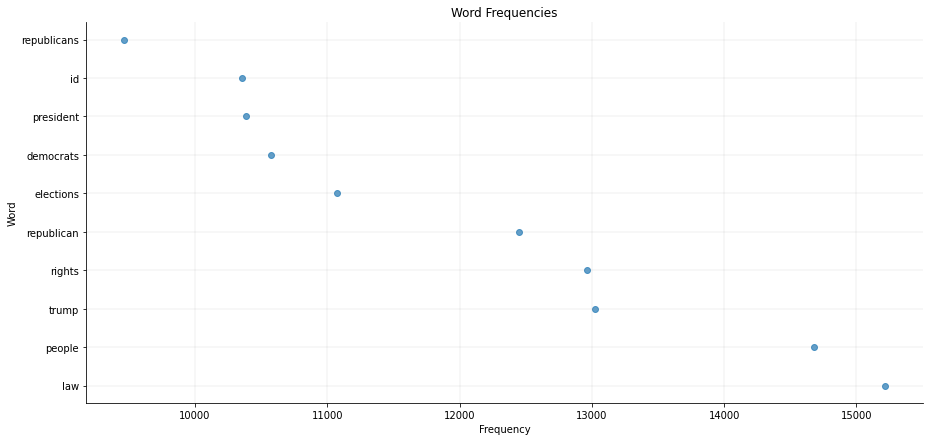

In [ ]:
# Plotting top words
scatterplot(cnt_df, 'freq', 'df')

In [136]:
# save data to csv file
df.to_csv('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Data/preprocessed_nov23.csv', index = False)

In [ ]:
# export text data to txt file for Iramuteq analysis
# left media
articles_l =left['maintext'].apply(str) 
with open('articles_left_nop.txt', 'w') as f:
    for line in articles_l:
        f.write(line)
        f.write(' ')

# right media
articles_r =right['maintext'].apply(str) 
with open('articles_right_nop.txt', 'w') as f:
    for line in articles_r:
        f.write(line)
        f.write(' ')

In [ ]:
# all articles
articletext = df['text'].apply(str) 
with open('text.txt', 'w') as f:
    for line in articletext:
        f.write(line)
        f.write(' ')